# **Neural Network, Decison Tree 98% Accuracy**

### **Importing libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
from sklearn.metrics import r2_score,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation

import pylab
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance

# import tensorflow and keras
import tensorflow as tf
from tensorflow.keras.models import Sequential   # used for initialize ANN model
from tensorflow.keras import layers   # used for different layer structure
from tensorflow.keras.layers import Dense

import pylab
import eli5 #for permutation importance
from eli5.sklearn import PermutationImportance
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **Reading Train Dataset**

In [4]:
train_set = pd.read_csv('Data_Disease Prediction Using Machine Learning/Training.csv')
test_set = pd.read_csv('Data_Disease Prediction Using Machine Learning/Testing.csv')
train_set = train_set.iloc[:,:-1]
train_set.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


### **Shape of training set**

In [7]:
nRow,nCol=train_set.shape
print(f'**Summary**:\n There are {nRow} rows and {nCol} columns. Prognosis is the target/label variable.')

**Summary**:
 There are 4920 rows and 133 columns. Prognosis is the target/label variable.


### **Output Variable: Prognosis**

In [8]:
train_set['prognosis'].value_counts()

prognosis
Fungal infection                           120
Allergy                                    120
GERD                                       120
Chronic cholestasis                        120
Drug Reaction                              120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Gastroenteritis                            120
Bronchial Asthma                           120
Hypertension                               120
Migraine                                   120
Cervical spondylosis                       120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Chicken pox                                120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                                120
Hep

In [9]:
print(f'**Summary**:\n There are 41 diseases in the dataset and each containing 120 rows. So, the dataset is equally balanced.')

**Summary**:
 There are 41 diseases in the dataset and each containing 120 rows. So, the dataset is equally balanced.


### **Data Pre-processing**
### **Checking Missing data points**

In [10]:
# Get the number of missing data points, NA's ,NAN's values per column
total = train_set.isnull().sum().sort_values(ascending=False)
percent = (train_set.isnull().sum()/train_set.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

total = train_set.isna().sum().sort_values(ascending=False)
percent = (train_set.isna().sum()/train_set.isna().count()).sort_values(ascending=False)
na_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

if((na_data.all()).all()>0 or (na_data.all()).all()>0):
     print('Found Missing Data or NA values')
        
else:
    print('There is no missing data or null values in the collected data. Additionally, the length of each column is same.')

There is no missing data or null values in the collected data. Additionally, the length of each column is same.


### **Detecting Outliers**

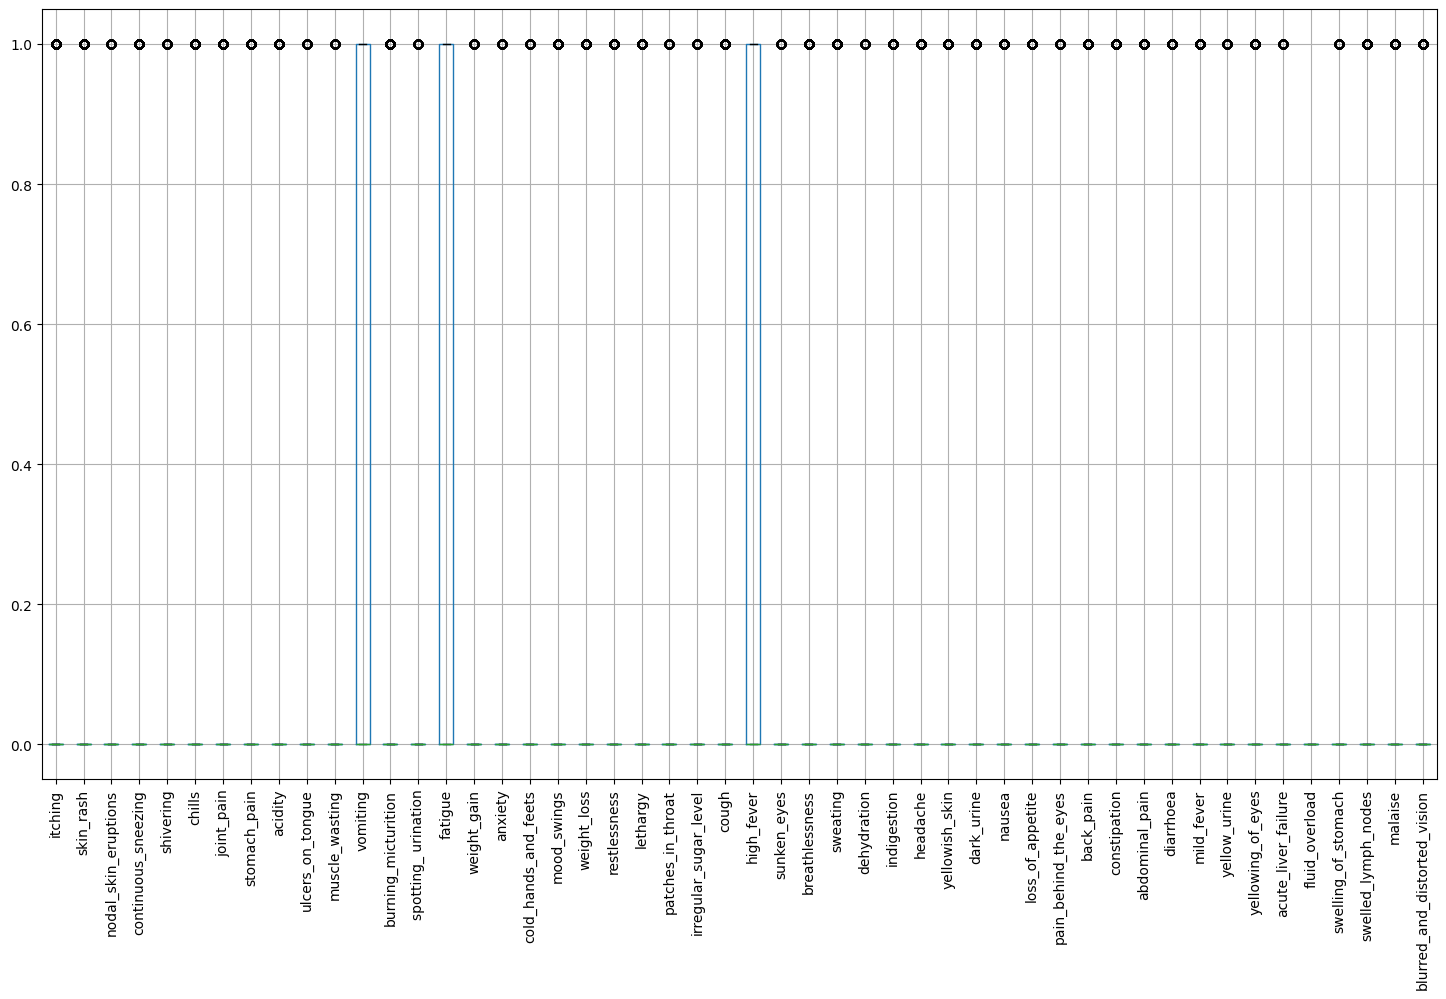

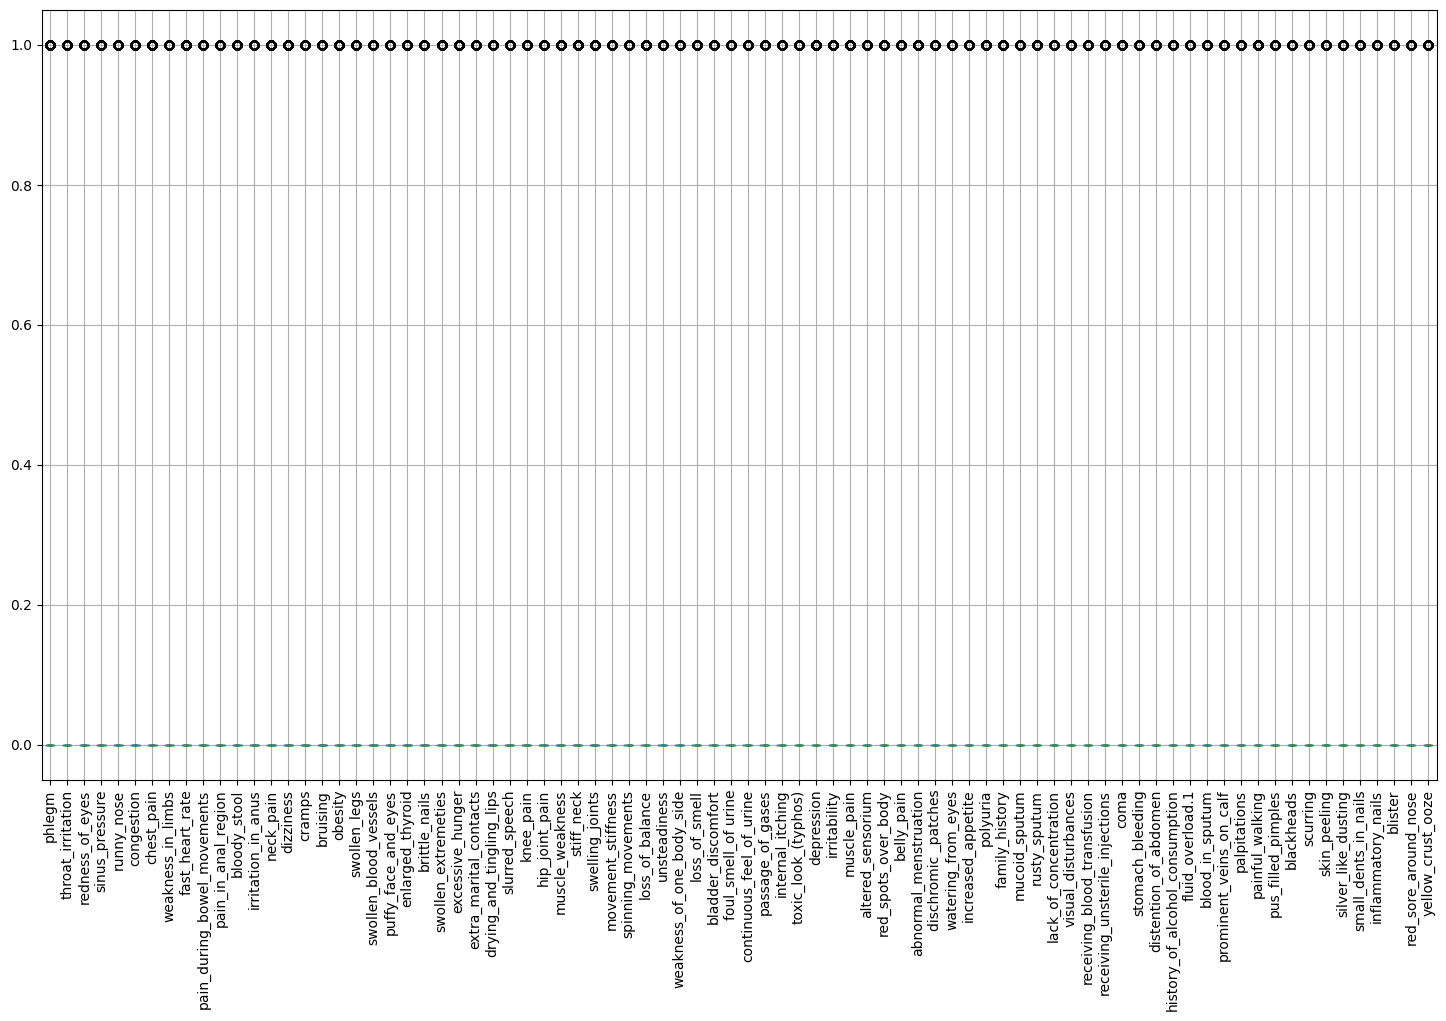

**Summary**:
 No outliers


In [11]:
temp_df=train_set.iloc[:,:-1]
#Detect outliers
plt.subplots(figsize=(18,10))
temp_df.iloc[:,:50].boxplot()
plt.xticks(rotation=90)
plt.show()

plt.subplots(figsize=(18,10))
temp_df.iloc[:,50:].boxplot()
plt.xticks(rotation=90)
plt.show()

print(f'**Summary**:\n No outliers')

### **Correlation Matrix**

In [13]:
train_set

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [21]:
train_set.iloc[:,:132]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


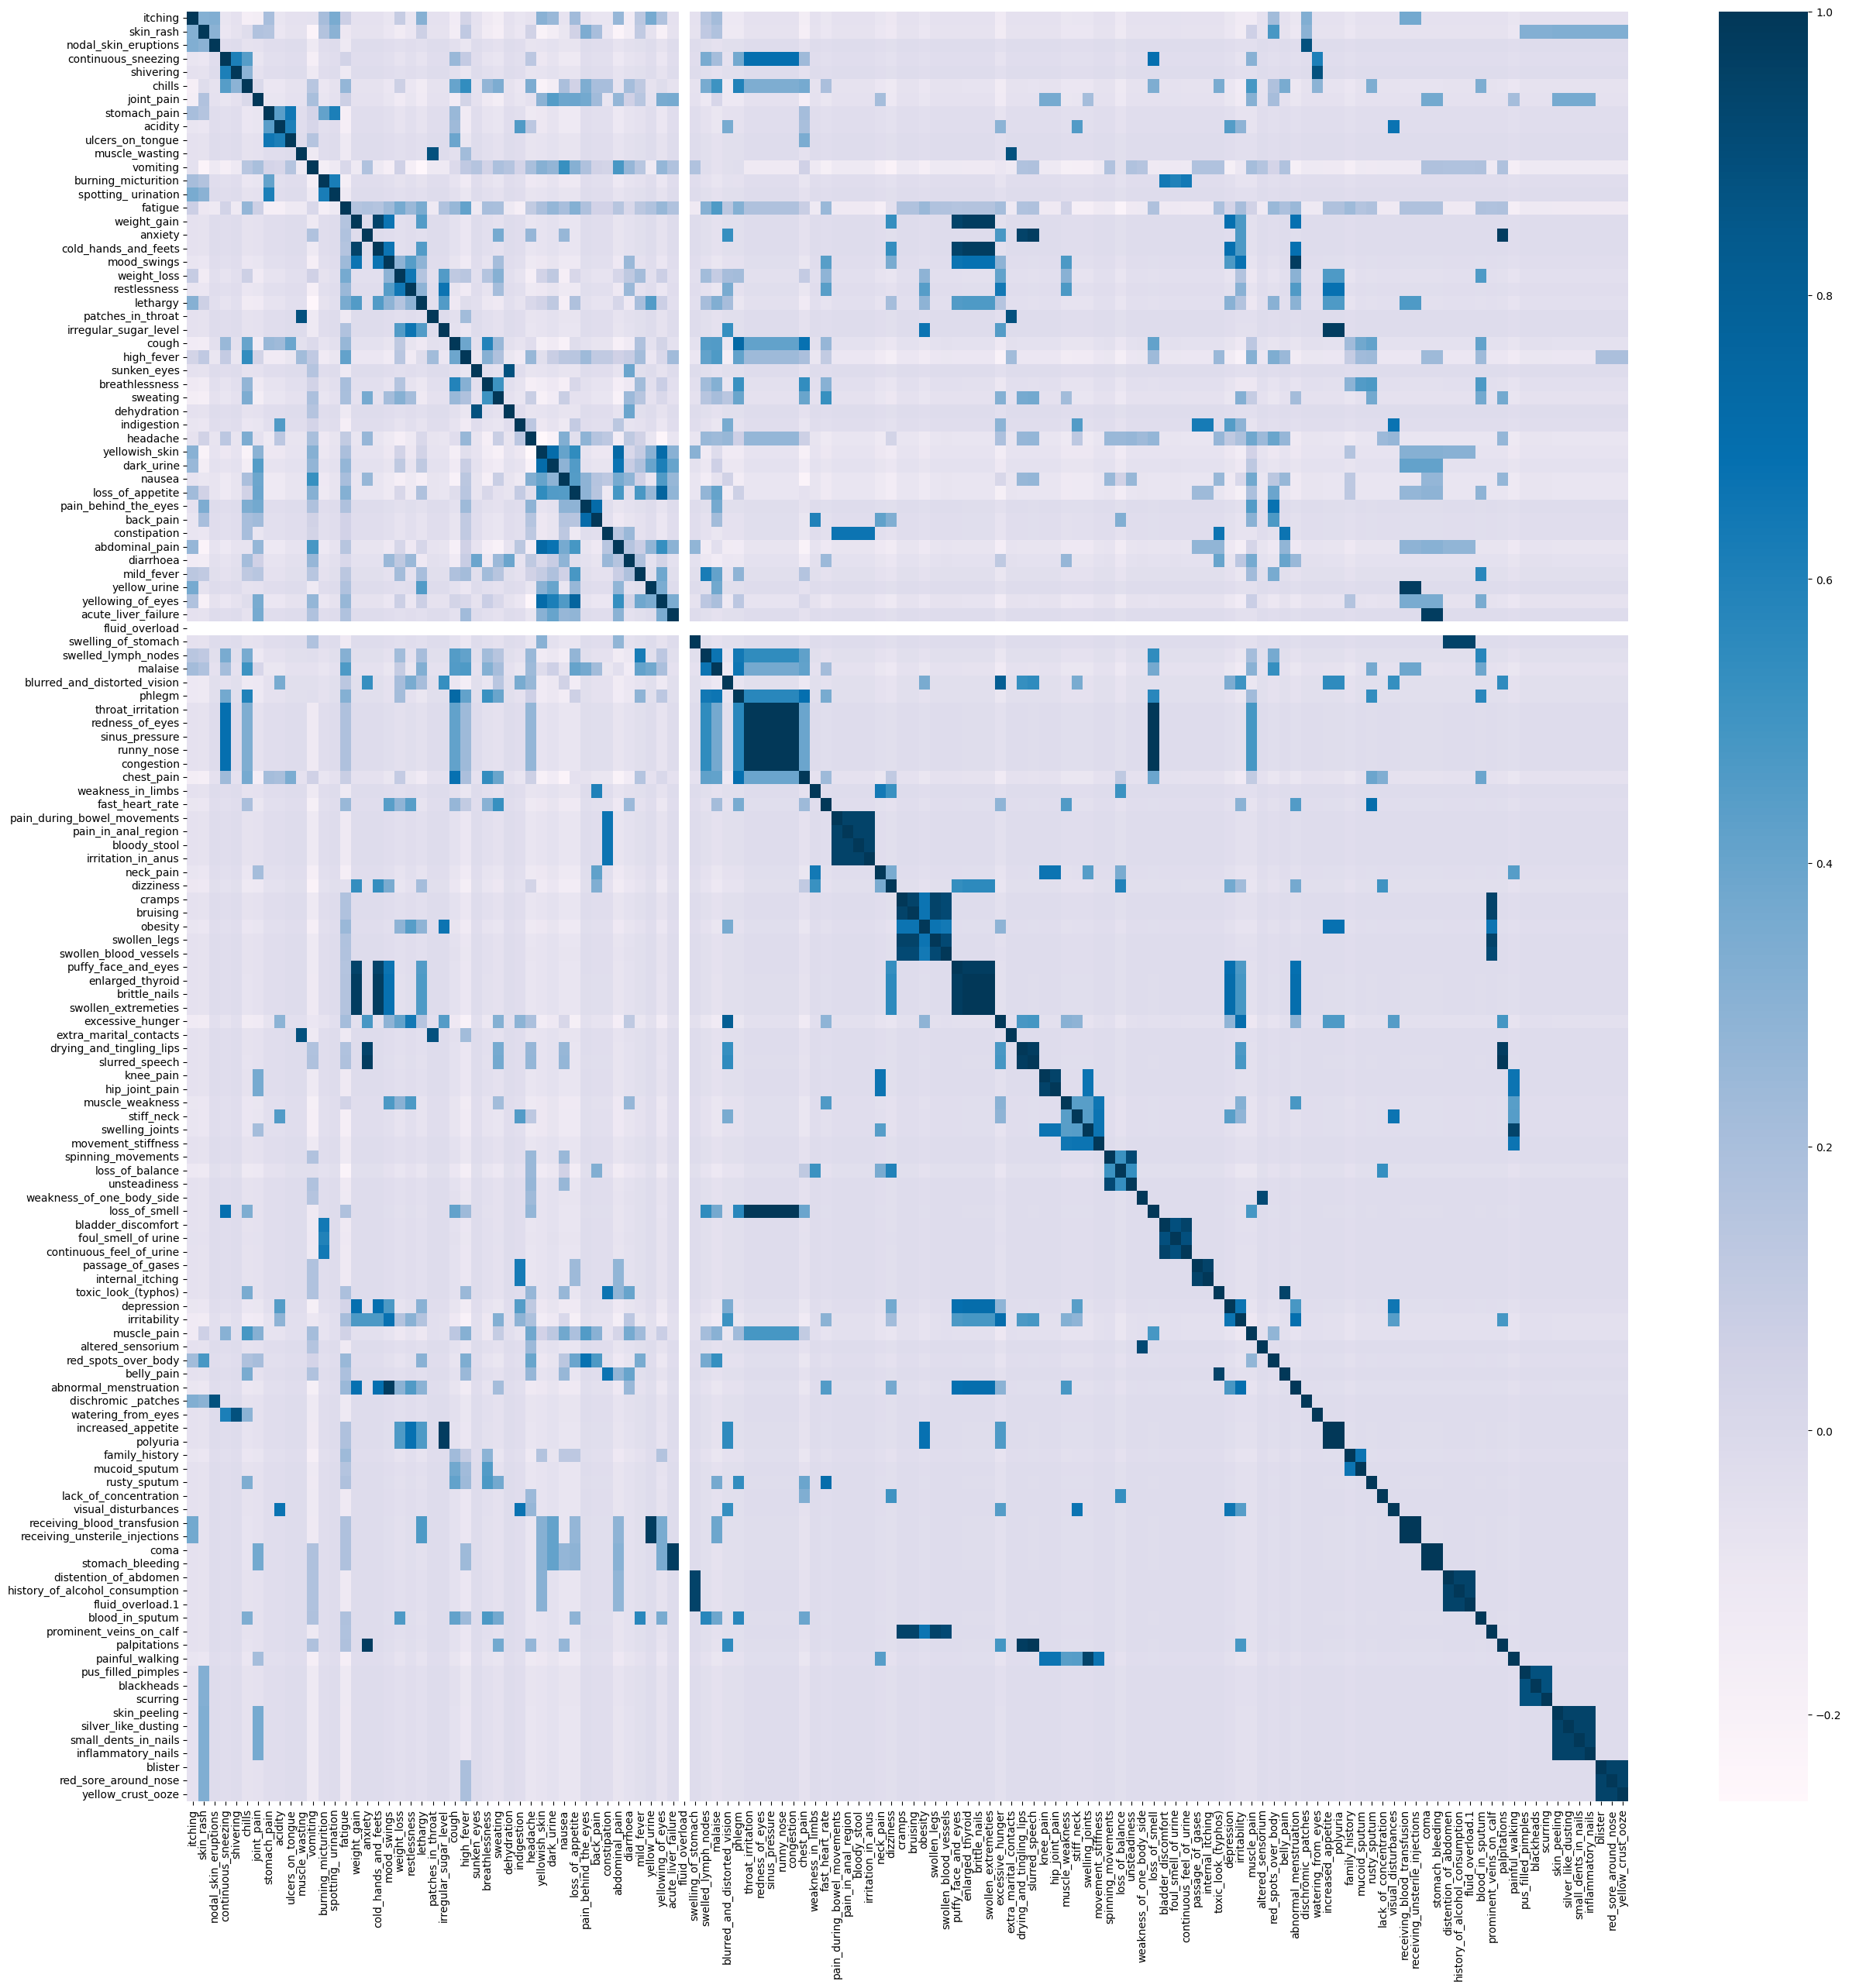

In [22]:
plt.figure(figsize = (30, 30))
sns.heatmap(train_set.iloc[:,:132].corr(), cmap = 'PuBu', annot = False)
plt.show()

In [24]:
corr_matrix=train_set.iloc[:,:132].corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,NaN,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,NaN,NaN,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,NaN,NaN,NaN,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,NaN,NaN,NaN,NaN,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,NaN,NaN,NaN,NaN,NaN,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.023720,-0.023720,-0.023720
blister,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120,0.946120
red_sore_around_nose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.946120


In [25]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop,len(to_drop))

train_set=train_set.drop(to_drop, axis=1)
test_set=test_set.drop(to_drop, axis=1)

['cold_hands_and_feets', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'bruising', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'drying_and_tingling_lips', 'slurred_speech', 'hip_joint_pain', 'unsteadiness', 'loss_of_smell', 'continuous_feel_of_urine', 'internal_itching', 'altered_sensorium', 'belly_pain', 'abnormal_menstruation', 'increased_appetite', 'polyuria', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'red_sore_around_nose', 'yellow_crust_ooze'] 42


In [26]:
train_set

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,rusty_sputum,lack_of_concentration,visual_disturbances,blood_in_sputum,pus_filled_pimples,blackheads,scurring,skin_peeling,blister,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,Psoriasis


### **Dropping constant feature columns**

In [27]:
# using sklearn variance threshold to find constant features
temp_train=train_set.iloc[:,:-1]

from sklearn.feature_selection import VarianceThreshold


sel = VarianceThreshold(threshold=0.03)
sel.fit(temp_train)

,threshold,0.03


In [28]:
# print the constant features
print(
    len([
        x for x in temp_train.columns
        if x not in temp_train.columns[sel.get_support()]
    ]))

to_drop=[x for x in temp_train.columns if x not in temp_train.columns[sel.get_support()]]
train_set=train_set.drop(to_drop, axis=1)
test_set=test_set.drop(to_drop, axis=1)

41


### **Label Encoder**

In [29]:
encoder = LabelEncoder()
train_set["prognosis"] = encoder.fit_transform(train_set["prognosis"])
test_set["prognosis"] = encoder.transform(test_set["prognosis"])

### **Test Valid Split**

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(train_set.drop('prognosis', axis = 1), 
                                                      train_set['prognosis'], test_size = .4, random_state=42,shuffle=True)

In [43]:
X_train.shape

(2952, 49)

In [44]:
test_set = pd.concat([test_set,pd.concat([X_valid,y_valid],axis=1)],axis=0)
test_set.shape

(2010, 50)

### **Logistic Regression**

In [45]:
lr=LogisticRegression(C=0.2,random_state=42, penalty='l2')
lr.fit(X_train,y_train)
print("Logistic Train score with ",format(lr.score(X_train, y_train)))

Logistic Train score with  0.9847560975609756


In [46]:
print("Logistic Test score with ",format(lr.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Logistic Test score with  0.9835820895522388


### **Confusion Matrix**

Text(0.5, 885.5555555555555, 'Predicted label')

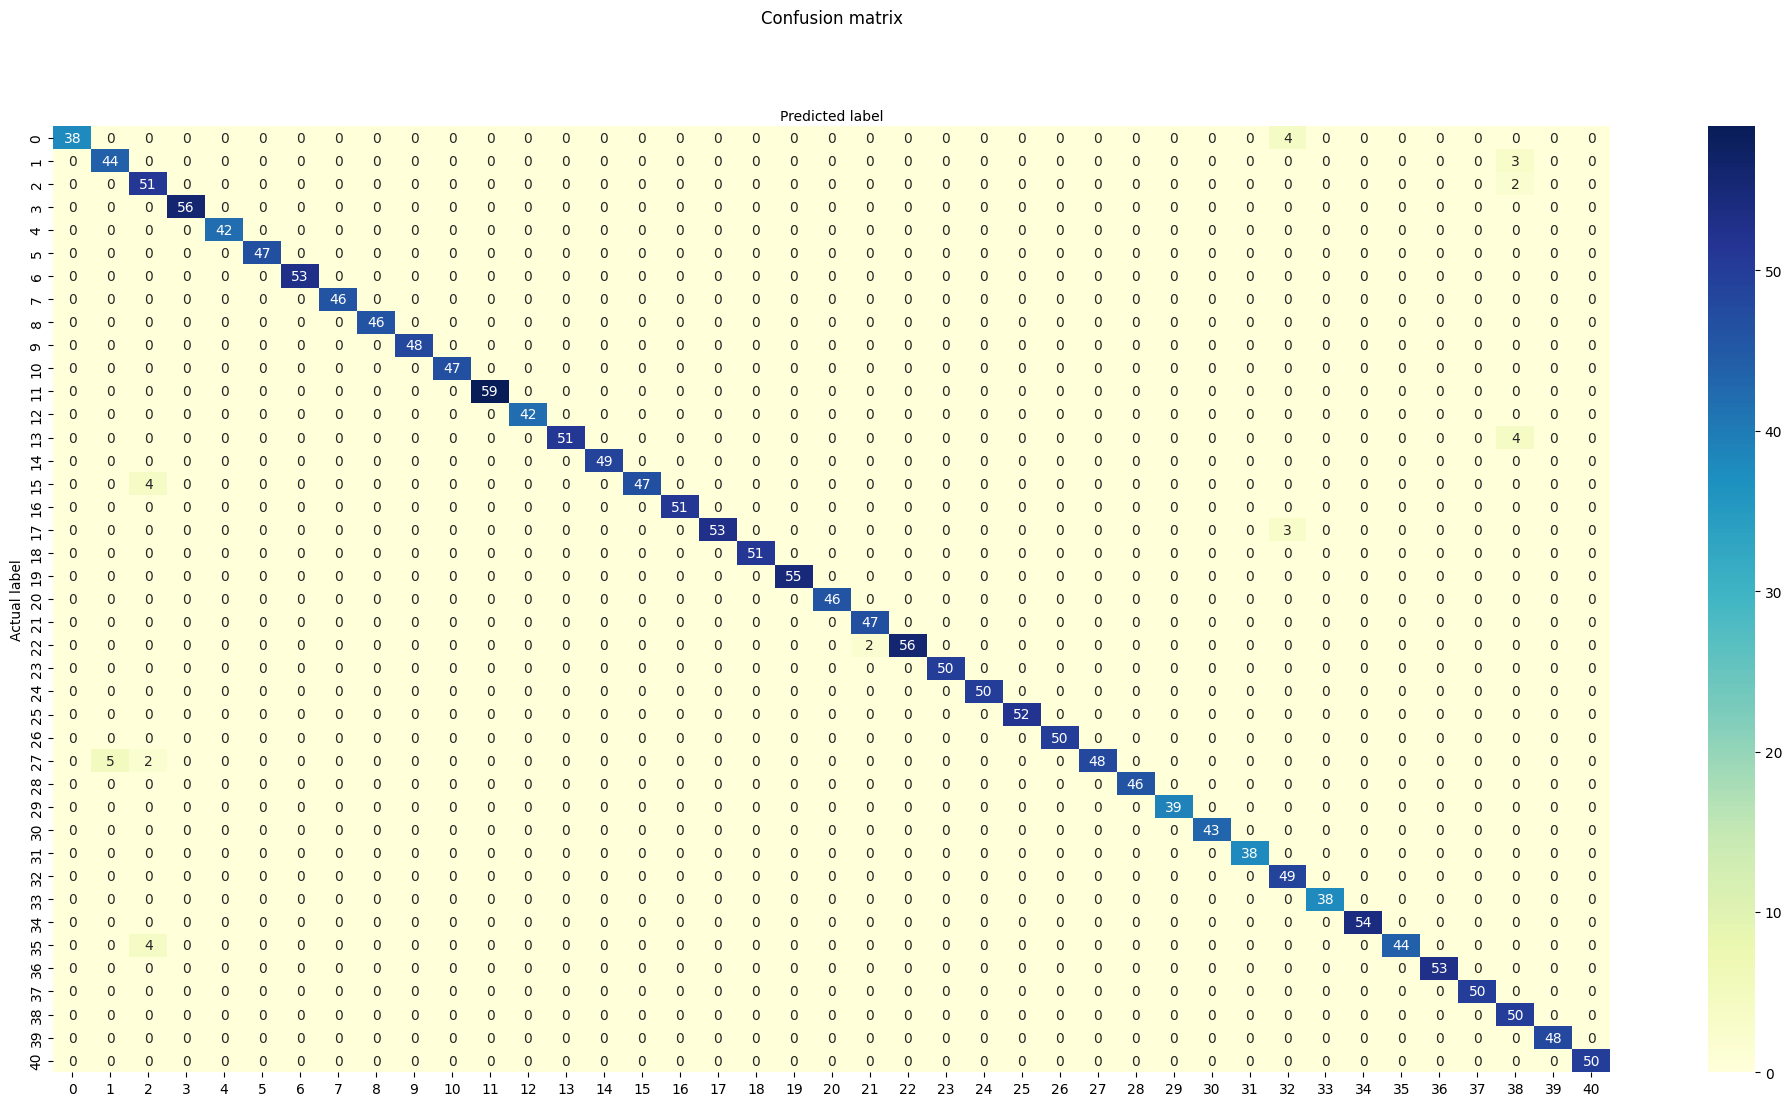

In [47]:
y_pred = lr.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### **Classification Report**

In [48]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.92      0.96        51
          16       1.00      1.00      1.00        51
          17       1.00    

In a medical test the big indicators of success are specificity and sensitivity.

Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative

Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

F1 score - a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

### **Decision Tree**

In [49]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree Train score with ",format(dt.score(X_train, y_train)))

Decision Tree Train score with  0.9854336043360433


In [50]:
print("Decision Tree Test score with ",format(dt.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Decision Tree Test score with  0.982089552238806


### **Confusion Matrix**

Text(0.5, 885.5555555555555, 'Predicted label')

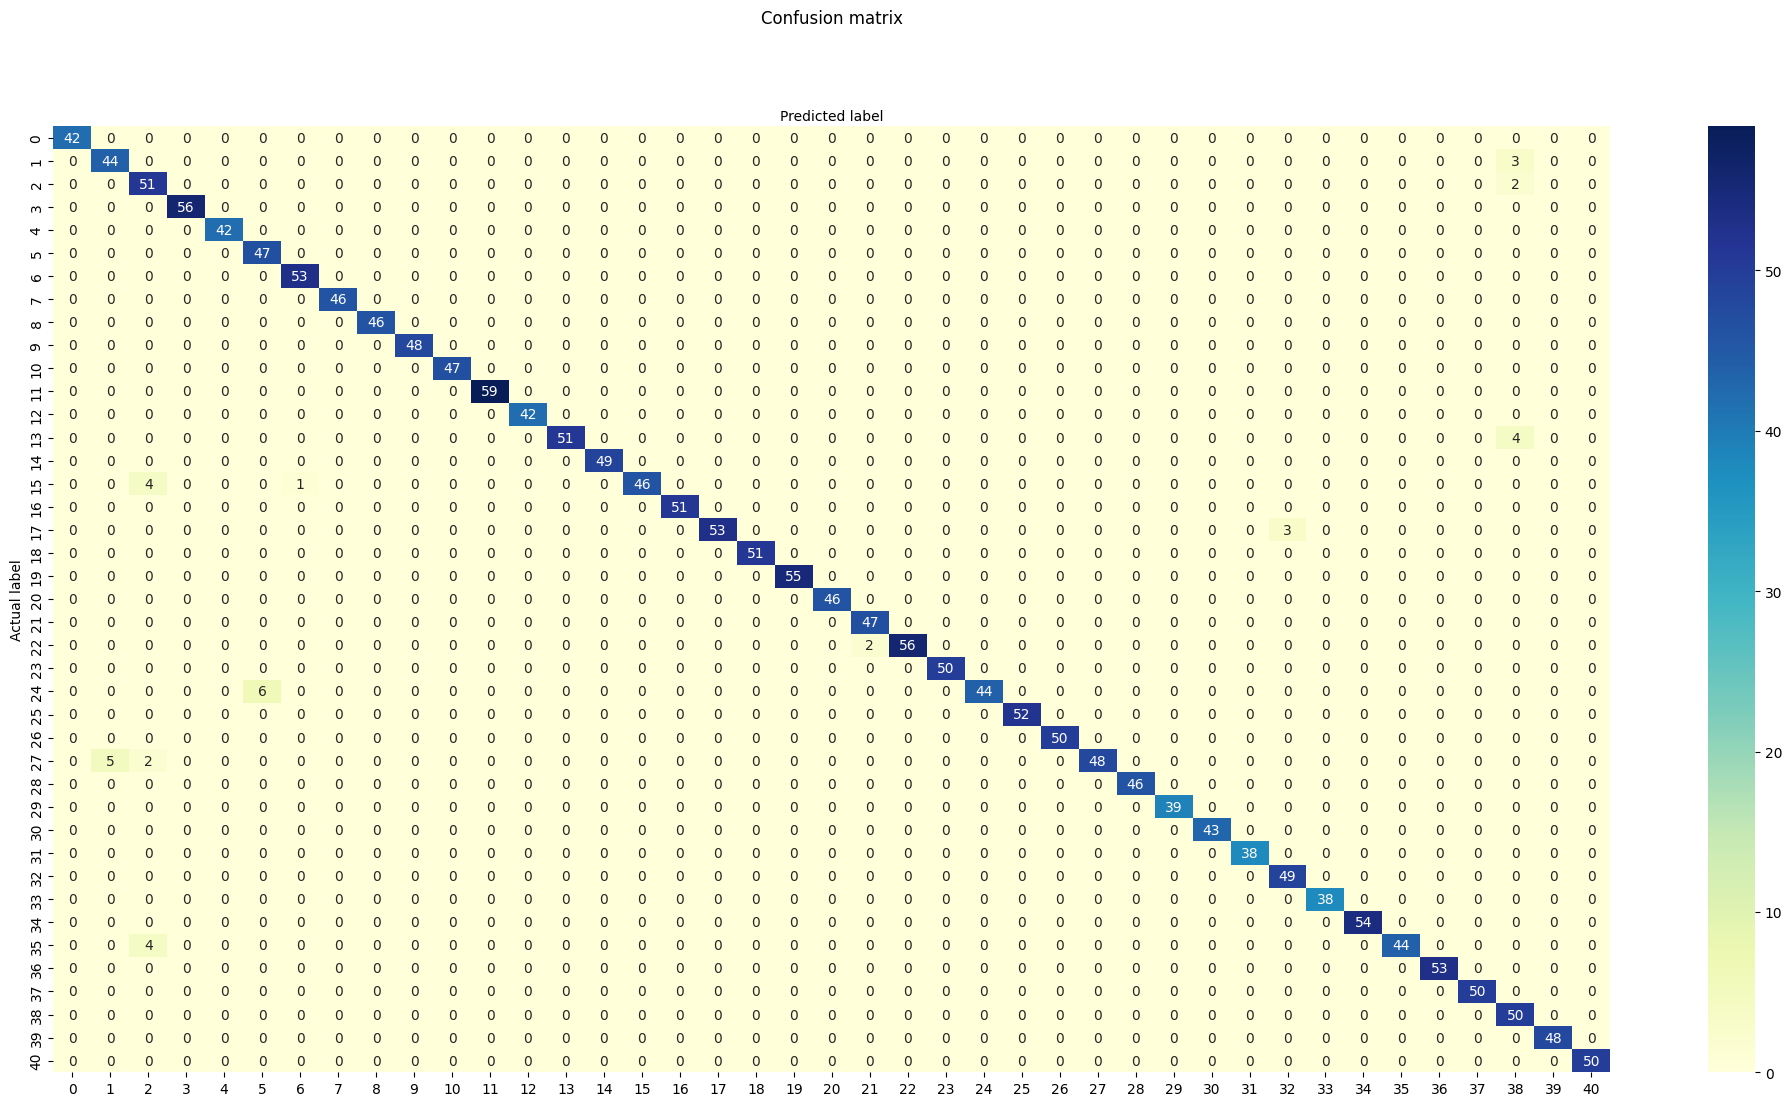

In [51]:
y_pred = dt.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### **Classification report**

In [52]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       0.89      1.00      0.94        47
           6       0.98      1.00      0.99        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.90      0.95        51
          16       1.00      1.00      1.00        51
          17       1.00    

In a medical test the big indicators of success are specificity and sensitivity.

Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative

Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

F1 score - a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

### **Random Forest**

In [55]:
X_train.value_counts()

itching  skin_rash  continuous_sneezing  chills  joint_pain  stomach_pain  acidity  vomiting  burning_micturition  fatigue  mood_swings  weight_loss  restlessness  lethargy  cough  high_fever  breathlessness  sweating  indigestion  headache  yellowish_skin  dark_urine  nausea  loss_of_appetite  back_pain  constipation  abdominal_pain  diarrhoea  mild_fever  yellowing_of_eyes  swelled_lymph_nodes  malaise  blurred_and_distorted_vision  phlegm  chest_pain  fast_heart_rate  neck_pain  dizziness  obesity  excessive_hunger  muscle_weakness  stiff_neck  swelling_joints  loss_of_balance  depression  irritability  muscle_pain  red_spots_over_body  family_history
0        1          0                    0       0           0             0        0         0                    0        0            0            0             0         0      0           0               0         0            0         0               0           0       0                 0          0             0               

In [57]:
y_train

3305    36
1096    34
3928    25
1741    23
1350     7
        ..
4426    35
466     33
3092    11
3772    15
860     14
Name: prognosis, Length: 2952, dtype: int64

In [56]:
y_train.value_counts()

prognosis
31    83
33    83
29    82
4     79
12    79
0     79
30    78
7     75
28    75
20    75
8     75
10    74
1     74
21    74
5     74
39    73
35    73
9     73
14    72
32    72
38    71
26    71
15    71
23    71
24    71
40    71
37    71
16    70
18    70
25    69
36    68
2     68
6     68
34    67
19    66
13    66
27    66
17    65
3     65
22    63
11    62
Name: count, dtype: int64

In [60]:
rf = RandomForestClassifier(max_depth=6,oob_score=True,random_state=42,criterion='entropy',max_features='sqrt',n_estimators=300)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_valid)
print("Random Forest Train score with ",format(rf.score(X_train, y_train)))

Random Forest Train score with  0.9773035230352304


In [61]:
perm_imp1 = PermutationImportance(rf, random_state=42,scoring='accuracy').fit(test_set.iloc[:,:-1], test_set['prognosis'])
eli5.show_weights(perm_imp1, feature_names = test_set.iloc[:,:-1].columns.tolist(),top=50)

Weight,Feature
0.1204 ± 0.0116,high_fever
0.0940 ± 0.0065,fatigue
0.0613 ± 0.0092,vomiting
0.0592 ± 0.0046,skin_rash
0.0402 ± 0.0092,joint_pain
0.0397 ± 0.0037,headache
0.0290 ± 0.0057,itching
0.0265 ± 0.0019,burning_micturition
0.0262 ± 0.0057,loss_of_appetite
0.0245 ± 0.0015,constipation


In [62]:
print("Random Forest Test score with ",format(rf.score(test_set.iloc[:,:-1], test_set['prognosis'])))

Random Forest Test score with  0.9796019900497512


### **Confusion Matrix**

Text(0.5, 885.5555555555555, 'Predicted label')

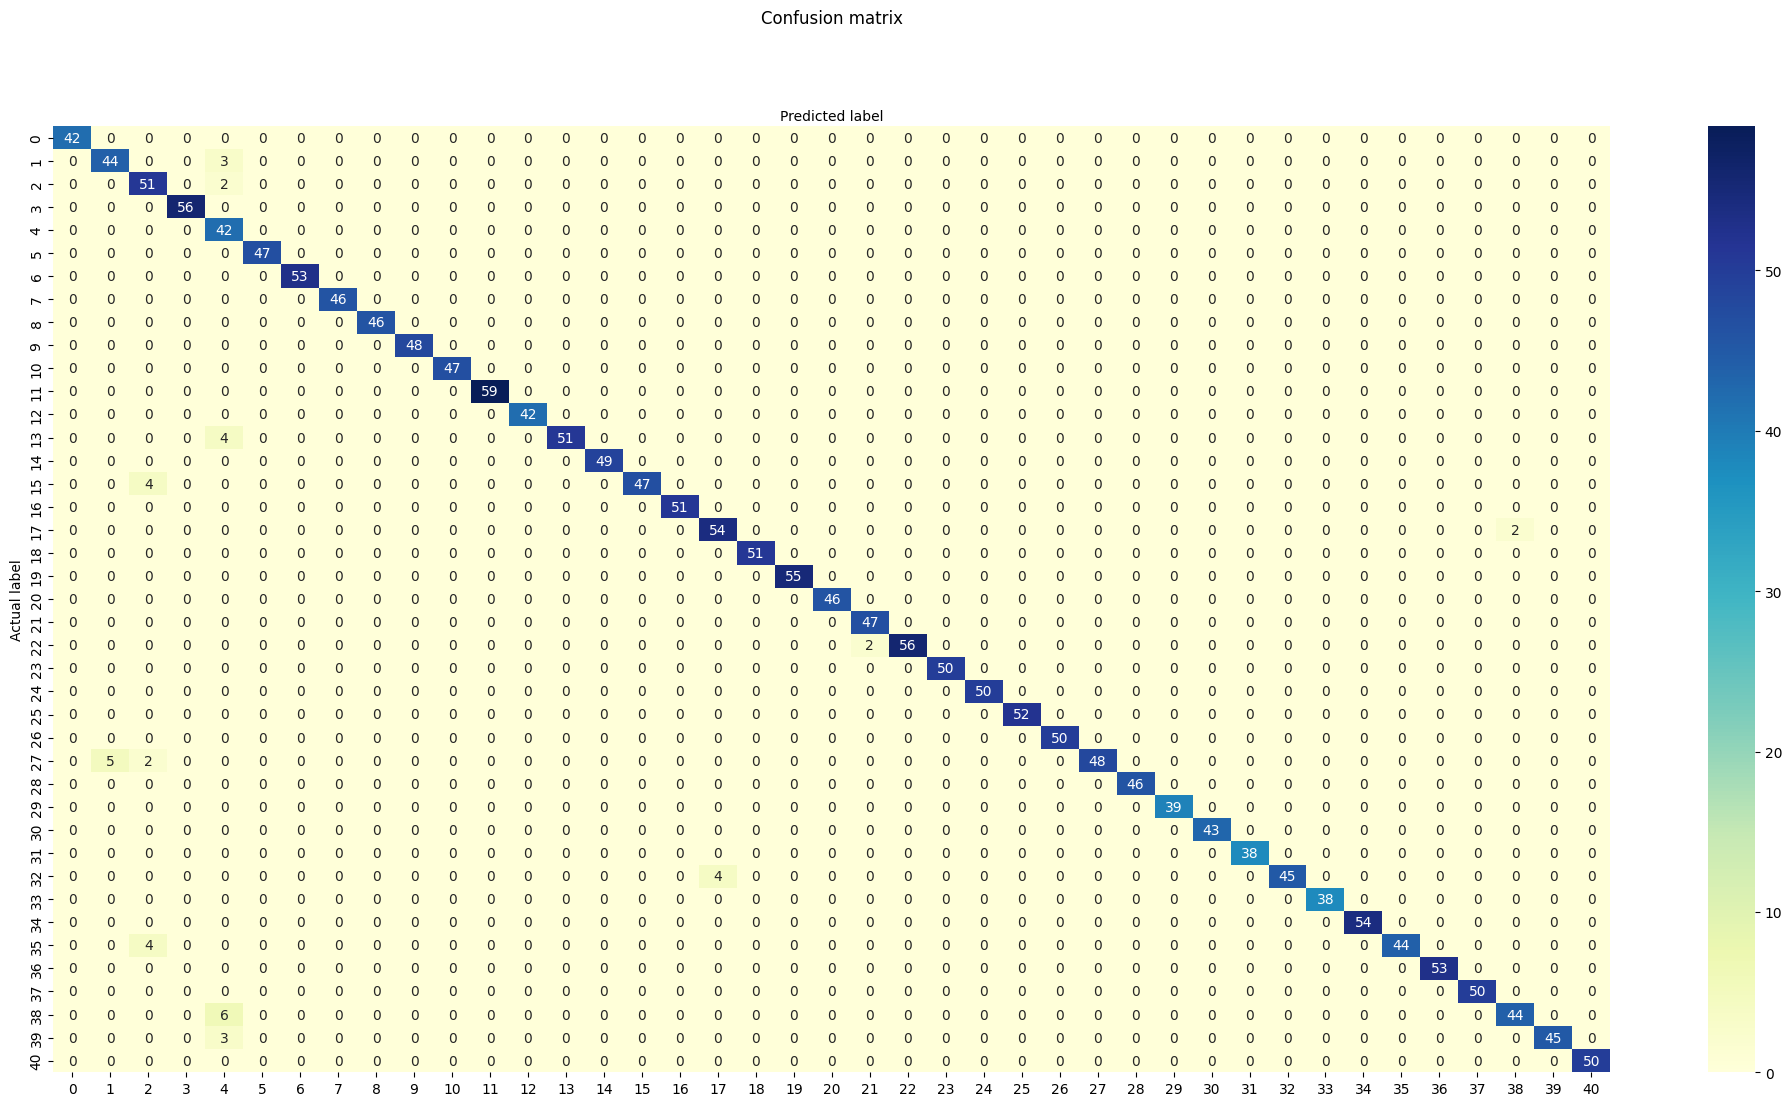

In [63]:
y_pred = rf.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### **Classification report**

In [64]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      1.00      1.00        56
           4       0.70      1.00      0.82        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.92      0.96        51
          16       1.00      1.00      1.00        51
          17       0.93    

In a medical test the big indicators of success are specificity and sensitivity.

Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative

Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

F1 score - a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

### **SVM**

In [65]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred=svm.predict(X_valid)
print("SVM Train score with ",format(svm.score(X_train, y_train)))

SVM Train score with  0.9854336043360433


In [66]:
print("SVM Test score with ",format(svm.score(test_set.iloc[:,:-1], test_set['prognosis'])))

SVM Test score with  0.9855721393034826


### **Confusion Matrix**

Text(0.5, 885.5555555555555, 'Predicted label')

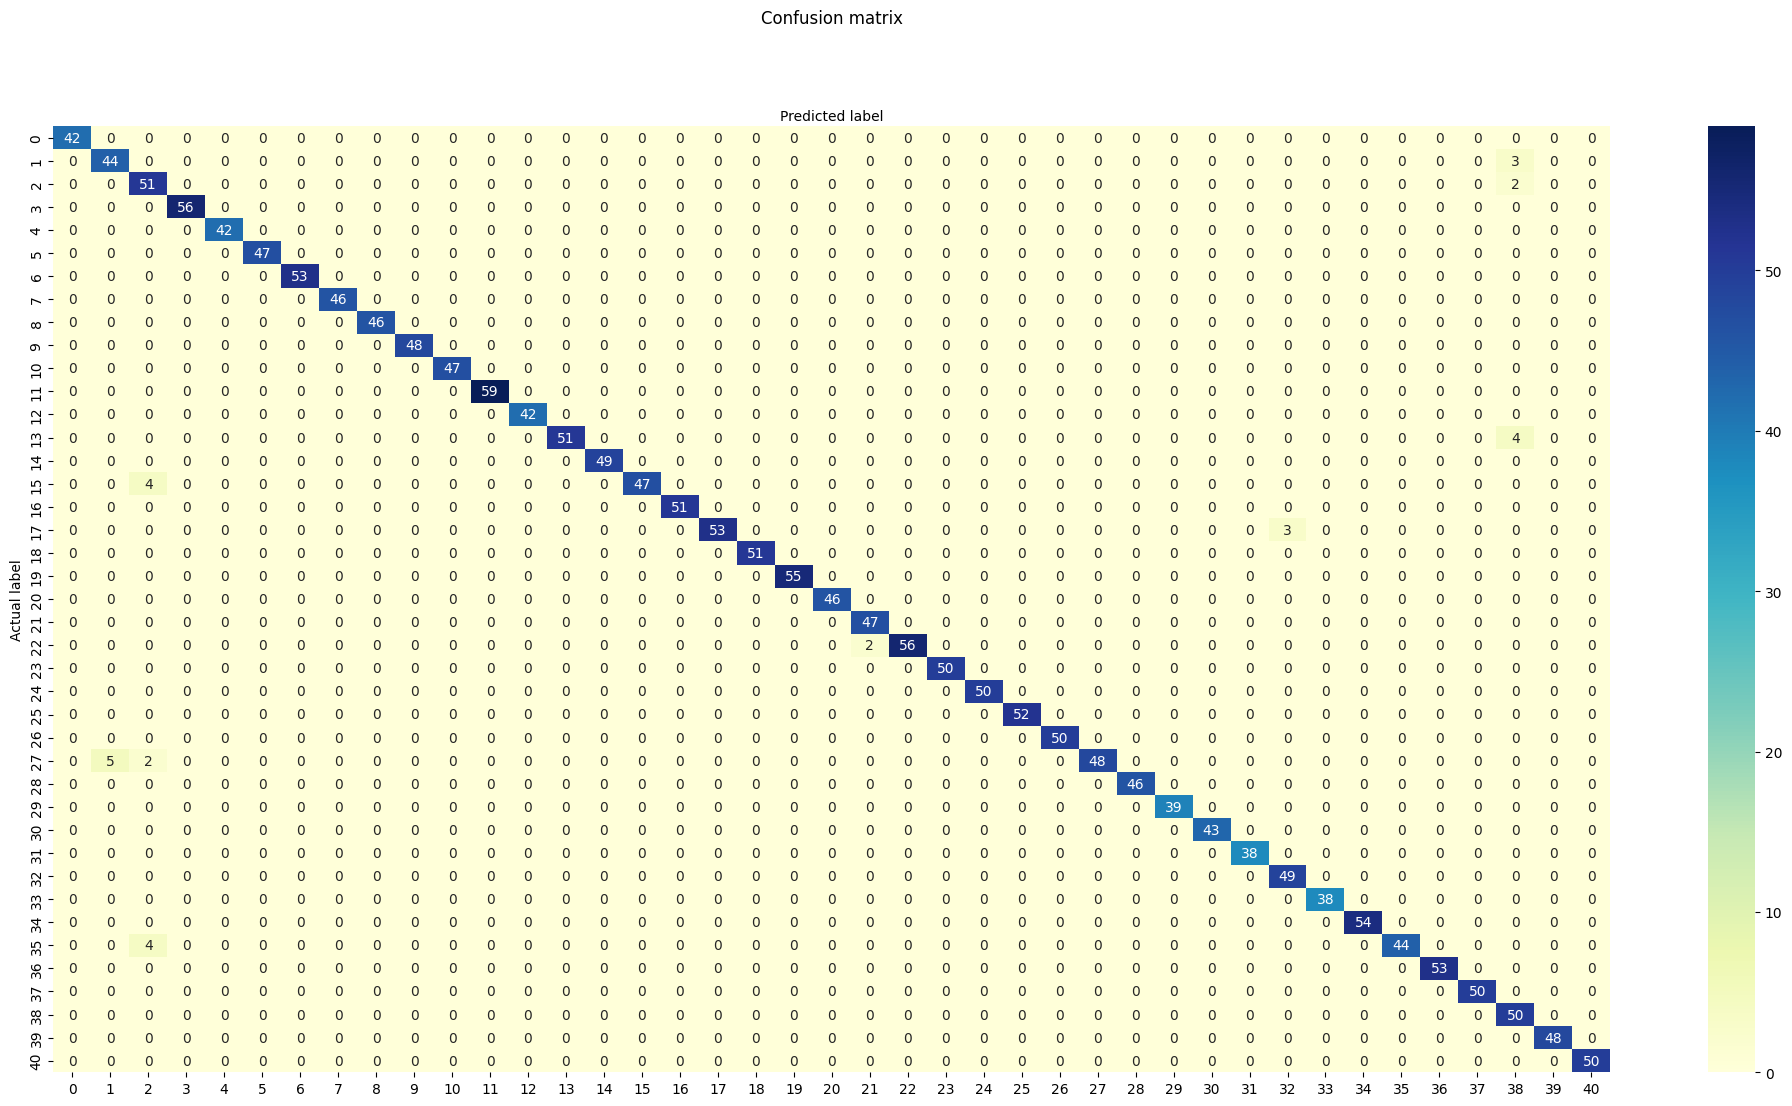

In [67]:
y_pred = svm.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### **Classification report**

In [68]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.92      0.96        51
          16       1.00      1.00      1.00        51
          17       1.00    

In a medical test the big indicators of success are specificity and sensitivity.

Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative

Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

F1 score - a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

### **Naive Bayes**

In [71]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred=bayes.predict(X_valid)
print("Naive Bayes Train score with ",format(bayes.score(X_train, y_train)))

Naive Bayes Train score with  0.967140921409214


In [72]:
print("Naive Bayes Test score with ",format(bayes.score(test_set.iloc[:,:-1], test_set['prognosis'])),'%')

Naive Bayes Test score with  0.9671641791044776 %


### **Confusion Matrix**

Text(0.5, 885.5555555555555, 'Predicted label')

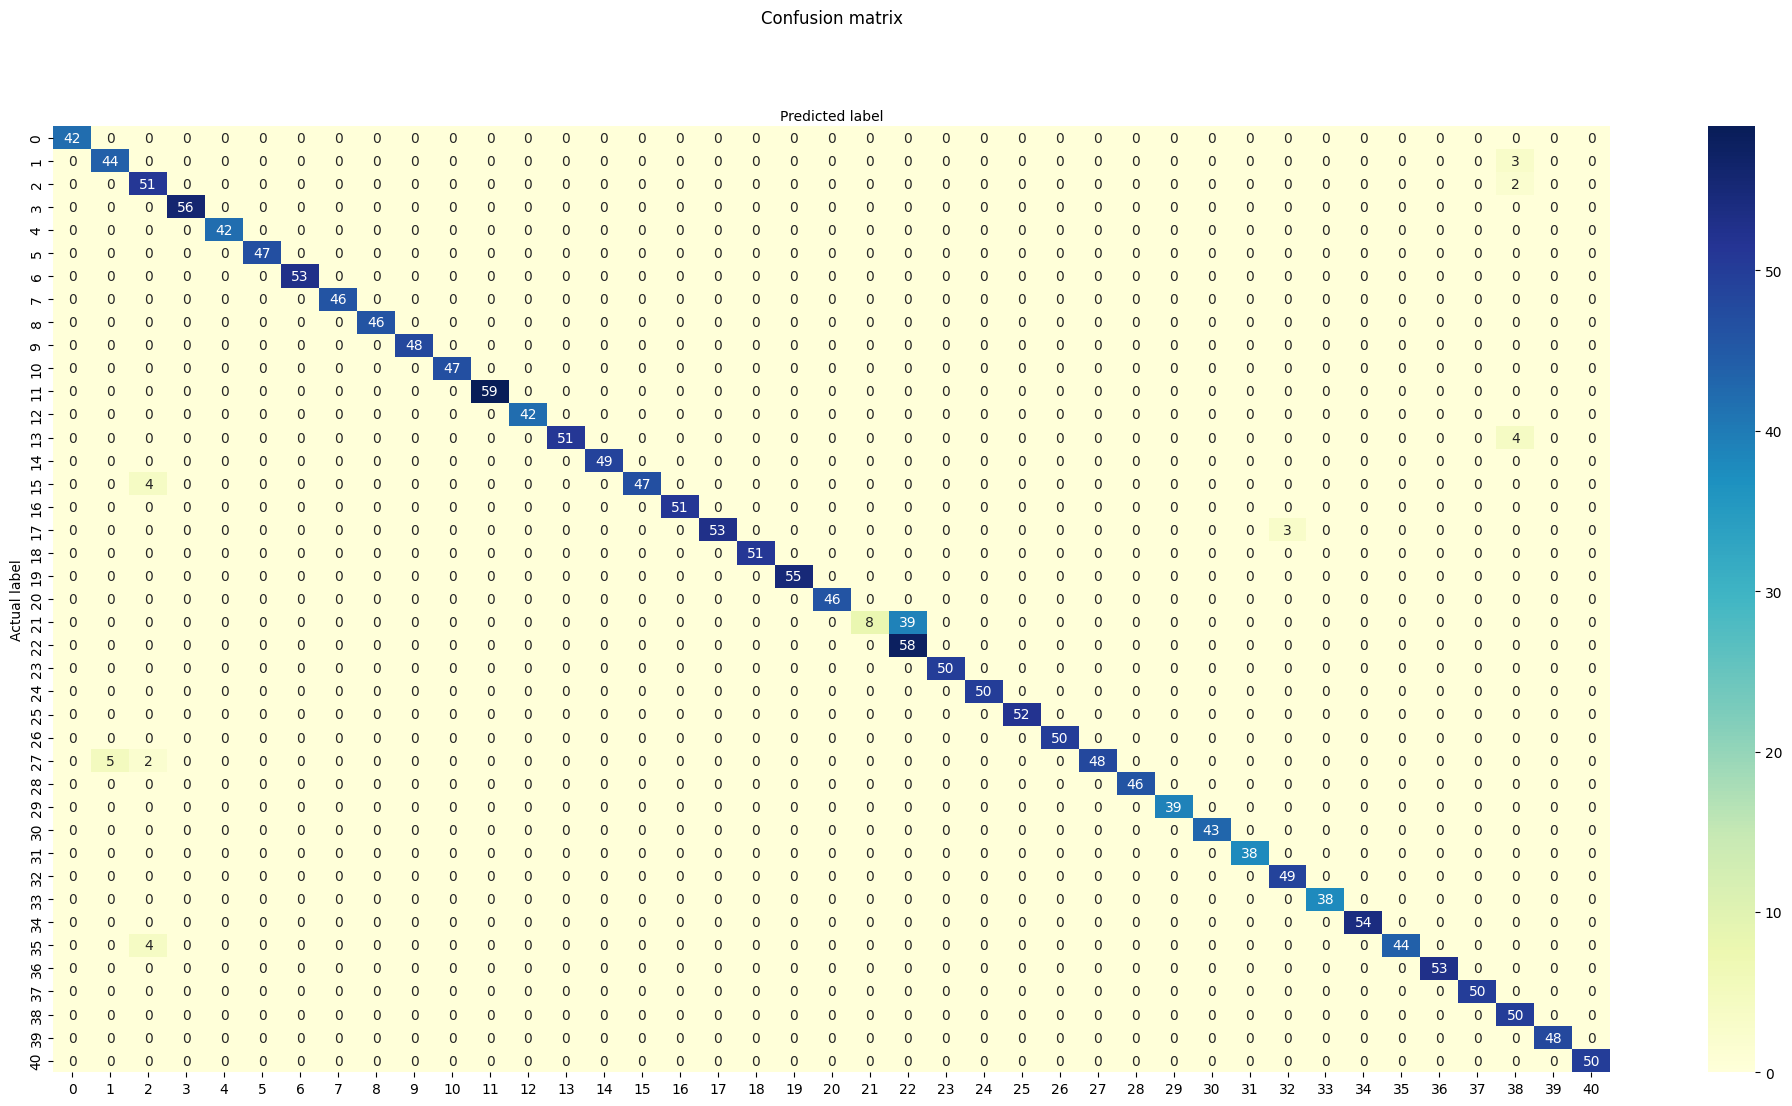

In [73]:
y_pred = bayes.predict(test_set.iloc[:,:-1])
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### **Classification report**

In [74]:
print(classification_report( test_set['prognosis'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.92      0.96        51
          16       1.00      1.00      1.00        51
          17       1.00    

In a medical test the big indicators of success are specificity and sensitivity.

Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative

Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

F1 score - a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

### **Neural Network**

In [75]:
# transform into dummies for y_train (prognosis variable)
y_train_dum = pd.get_dummies(y_train)

In [76]:
classifier = Sequential()

classifier.add(Dense(64, activation = "relu", input_dim = X_train.shape[1]))
# adding second hidden layer
classifier.add(Dense(48, activation = "relu"))
# adding last layer
classifier.add(Dense(y_train_dum.shape[1], activation = "softmax"))

classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
classifier.summary()


history = classifier.fit(X_train, y_train_dum, epochs = 5, batch_size = 30)

print("ANN Train score with ",format(history.history['accuracy'][-1]))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 41)             │         2,009 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,329 (32.54 KB)

 Trainable params: 8,329 (32.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4021 - loss: 3.0865    
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8713 - loss: 1.1525
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9780 - loss: 0.3091
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9827 - loss: 0.1438
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9854 - loss: 0.0990  
ANN Train score with  0.9854335784912109


In [77]:
prediction = classifier.predict(test_set.iloc[:,:-1])

prediction = [np.argmax(i) for i in prediction ]

print("ANN Test score with ",format(accuracy_score(test_set['prognosis'], prediction)*100),'%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ANN Test score with  98.55721393034827 %


### **Confusion Matrix**

Text(0.5, 885.5555555555555, 'Predicted label')

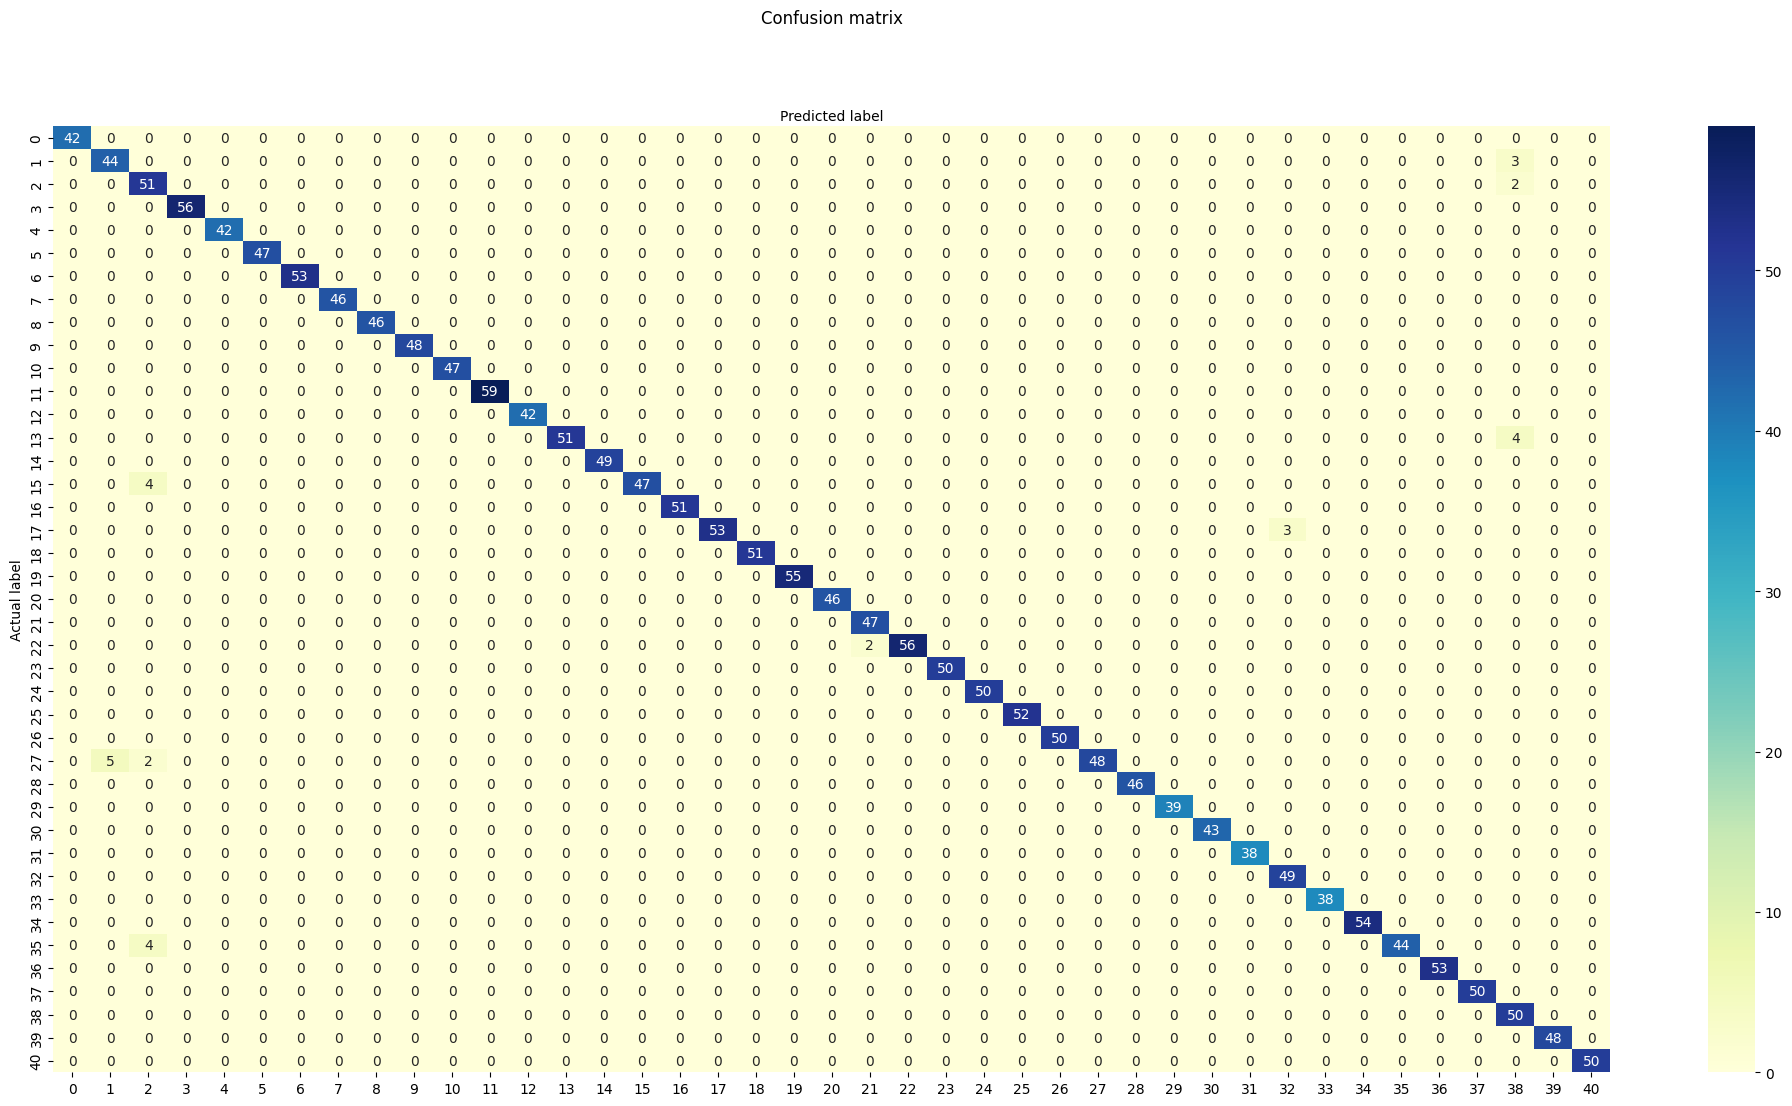

In [78]:
class_names=encoder.classes_
fig, ax = plt.subplots(figsize = (20,10))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
cm = confusion_matrix(test_set['prognosis'], prediction)
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### **Classification report**

In [79]:
print(classification_report( test_set['prognosis'], prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.90      0.94      0.92        47
           2       0.84      0.96      0.89        53
           3       1.00      1.00      1.00        56
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        46
           8       1.00      1.00      1.00        46
           9       1.00      1.00      1.00        48
          10       1.00      1.00      1.00        47
          11       1.00      1.00      1.00        59
          12       1.00      1.00      1.00        42
          13       1.00      0.93      0.96        55
          14       1.00      1.00      1.00        49
          15       1.00      0.92      0.96        51
          16       1.00      1.00      1.00        51
          17       1.00    

In a medical test the big indicators of success are specificity and sensitivity.

Sensitivity/recall – how good a test is at detecting the positives. A test can cheat and maximize this by always returning “positive”.

Specificity – how good a test is at avoiding false alarms. A test can cheat and maximize this by always returning “negative

Precision – how many of the positively classified were relevant. A test can cheat and maximize this by only returning positive on one result it’s most confident in.

F1 score - a good F1 score means that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms.

### **Model Accuracy Comparision**

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Leopolt\AppData\Local\Temp\ipykernel_8112\1079211838.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


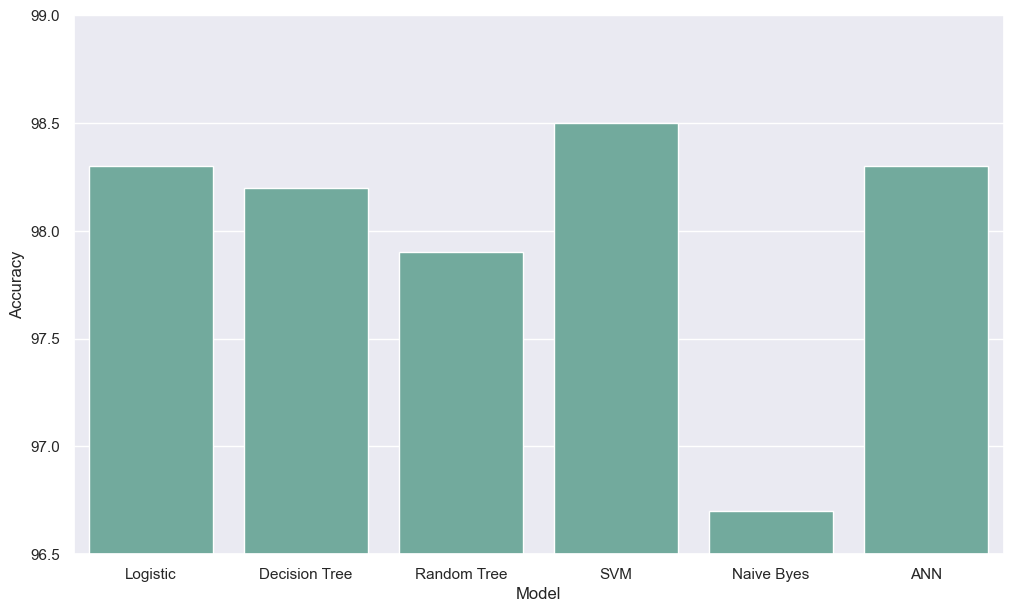

In [8]:
sns.set(style="darkgrid")

acc = pd.DataFrame({'Model':['Logistic','Decision Tree','Random Tree','SVM','Naive Byes','ANN'],'Accuracy':[98.3,98.2,97.9,98.5,96.7,98.3]})

# Set the figure size
fig, ax =  plt.subplots(figsize=(12, 7))
ax.set_ylim(96.5, 99)
# plot a bar chart
sns.barplot(
    x="Model", 
    y="Accuracy", 
    data=acc,  
    ci=None, 
    color='#69b3a2',
    orient = 'v');
plt.show()